Cluster 1 tidak memiliki anggota. Menghasilkan centroid baru.
Cluster 4 tidak memiliki anggota. Menghasilkan centroid baru.


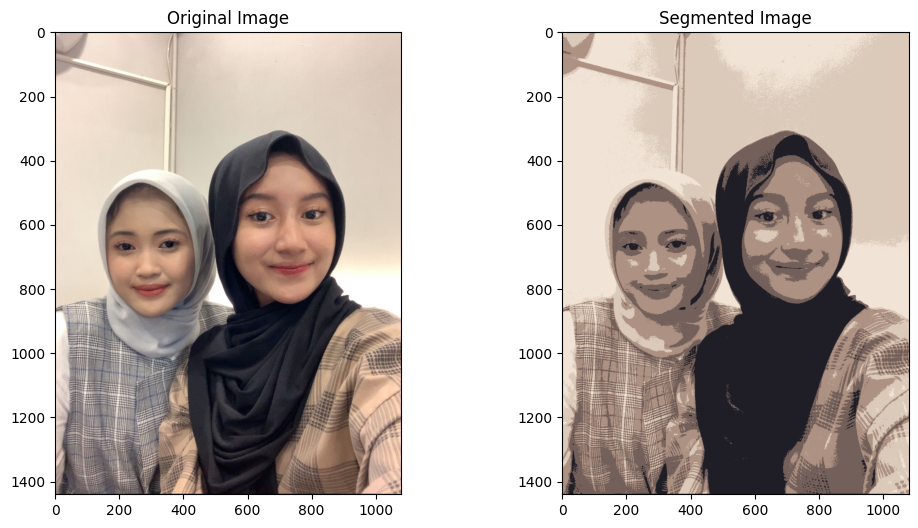

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the image
img = plt.imread('gambar/Dua.jpg')

# Reshape the image into a 2D array of pixels
pixels = img.reshape((-1, 3))

# Define the number of clusters (k)
k = 5

# Initialize the centroids randomly
centroids = np.random.rand(k, 3)

# Initialize the cluster assignments
cluster_assignments = np.zeros((pixels.shape[0],))

# Iterate until convergence
while True:
    # Calculate the distance between each pixel and each centroid
    distances = np.linalg.norm(pixels[:, np.newaxis] - centroids, axis=2)

    # Assign each pixel to the closest centroid
    new_cluster_assignments = np.argmin(distances, axis=1)

    # Check for convergence
    if np.array_equal(cluster_assignments, new_cluster_assignments):
        break

    # Update the centroids with handling empty clusters
    new_centroids = []
    for i in range(k):
        cluster_pixels = pixels[new_cluster_assignments == i]
        if cluster_pixels.size == 0:
            print(f"Cluster {i} tidak memiliki anggota. Menghasilkan centroid baru.")
            new_centroids.append(pixels[np.random.randint(0, pixels.shape[0])])  # Pilih centroid baru secara acak
        else:
            new_centroids.append(cluster_pixels.mean(axis=0))
    centroids = np.array(new_centroids)

    # Update the cluster assignments
    cluster_assignments = new_cluster_assignments

# Segment the image using the cluster assignments
segmented_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
for i in range(k):
    mask = cluster_assignments.reshape(img.shape[0], img.shape[1]) == i
    segmented_img[mask] = centroids[i].astype(np.uint8)

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title('Segmented Image')
plt.show()